Then, in the next cell, replace the filename with your own DASH log name.

In [ ]:
# Change the filename
#filename = "ASTREAM_LOGS/DASH_BUFFER_LOG_2025-04-02.19_18_11.csv"
filename = "ASTREAM_LOGS_Q6/DASH_BUFFER_LOG_2025-04-27.06_56_37.csv"
#filename = open("DASH_BUFFER_LOG_2025-01-09.16_43_00.csv", "r")

The last cell will read in the data and plot the video rate against time (higher rate means higher quality video!)

The background of the plot will be shaded according to the video playback status: a light cyan background means the video is playing, while a light pink background means the video is buffering ("frozen").

In [4]:
%pip install matplotlib
%pip install pandas

  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.4 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.8 MB/s eta 0:00:00a 0:00:01m
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
Note: you may

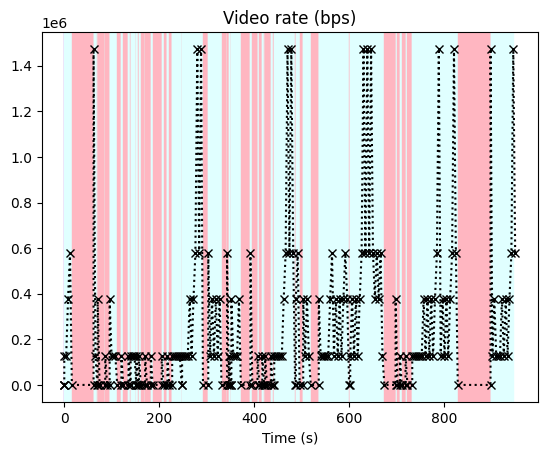

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

dash = pd.read_csv(filename)
dash = dash.loc[dash.CurrentPlaybackState.isin(c.keys() )]
states = pd.DataFrame({'startState': dash.CurrentPlaybackState[0:-2].values, 'startTime': dash.EpochTime[0:-2].values,
                        'endState':  dash.CurrentPlaybackState[1:-1].values, 'endTime':   dash.EpochTime[1:-1].values})


for index, s in states.iterrows():
  plt.axvspan(s['startTime'], s['endTime'],  color=c[s['startState']], alpha=1)

plt.plot(dash[dash.Action!="Writing"].EpochTime, dash[dash.Action!="Writing"].Bitrate, 'kx:')
plt.title("Video rate (bps)")
plt.xlabel("Time (s)")

We can also visualize the buffer occupancy over time. In the following plot, the line shows the number of segments in the buffer over time, and the colored background indicates whether the client is playing video (light cyan) or buffering (light pink). When the buffer occupancy goes to zero, the will have to stop playing in order to retrieve more data into the buffer.

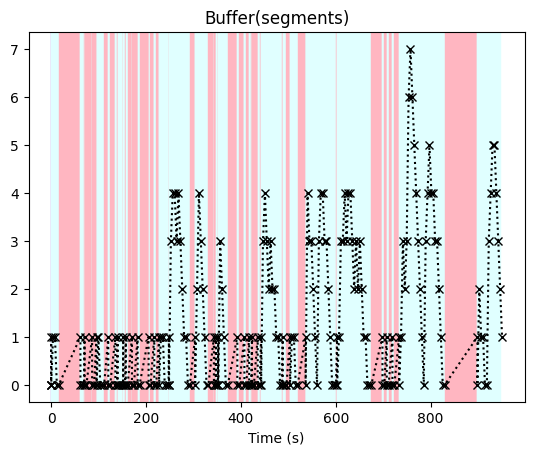

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}
#filename = open("DASH_BUFFER_LOG_2025-01-09.16_43_00.csv", "r")
dash = pd.read_csv(filename)
dash = dash.loc[dash.CurrentPlaybackState.isin(c.keys() )]
states = pd.DataFrame({'startState': dash.CurrentPlaybackState[0:-2].values, 'startTime': dash.EpochTime[0:-2].values,
                        'endState':  dash.CurrentPlaybackState[1:-1].values, 'endTime':   dash.EpochTime[1:-1].values})


for index, s in states.iterrows():
  plt.axvspan(s['startTime'], s['endTime'],  color=c[s['startState']], alpha=1)

plt.plot(dash[dash.Action!="Writing"].EpochTime, dash[dash.Action!="Writing"].CurrentBufferSize, 'kx:')
plt.title("Buffer(segments)");
plt.xlabel("Time (s)");